<a href="https://colab.research.google.com/github/Henrymelendez/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [3]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
# Mean of sales 
total = sum(sales)
mean_sales = total / len(sales)
print('Mean Sales:',mean_sales)

# Variance of Sales 
def subtract_mean(number):
  return number - mean_sales
# Map function to the list 
distances = list(map(subtract_mean,sales))

squared_distance = list(map(lambda x: x**2, distances))

list_length = len(squared_distance)-1
list_length = len(squared_distance)

variance_sales = sum(squared_distance)/list_length
print('Variance :','{:.2f}'.format(variance_sales,3))

# Standard Deviation 

print('Standard Deviation :',math.sqrt(variance_sales))

Mean Sales: 3052.714285714286
Variance : 183761.06
Standard Deviation : 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
customers = [127, 80, 105, 92, 120, 115, 93]
print('Covariance :',np.cov(sales,customers)[0][1])


Covariance : 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [5]:
df= pd.DataFrame({'sales':sales})
df['customers'] = pd.DataFrame(customers)

std_sales = df['sales'].std(ddof = 1)
std_customers = df['customers'].std(ddof= 1)
print('Standard:','{:.4f}'.format(std_sales))
print('Standard:','{:.4f}'.format(std_customers))

Standard: 463.0204
Standard: 17.0573


In [6]:
cov_sc = df['sales'].cov(df['customers'])
print('covariance:','{:.4f}'.format(cov_sc))

covariance: 7604.3571


In [7]:
denominator = std_sales*std_customers
corr_sc = cov_sc/denominator
print('Covariance:','{:.6f}'.format(corr_sc))

Covariance: 0.962834


In [8]:
print('Covarinace:','{:.6f}'.format(df['sales'].corr(df['customers'])))

Covarinace: 0.962834


In [9]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [10]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_df = titanic_df.replace({'male':1,'female':0})

titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [11]:
titanic_df.var()

Unnamed: 0          143117.500000
pclass                   0.701969
survived                 0.236250
sex                      0.229438
age                    165.850021
sibsp                    1.085052
parch                    0.749195
fare                  2678.959738
body                  9544.688567
has_cabin_number         0.174613
dtype: float64

In [12]:
titanic_df.cov()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,22.561162,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,0.050011,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.123090,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
sex,22.561162,0.050011,-0.123090,0.229438,0.354202,-0.054690,-0.088362,-4.600321,-0.387672,-0.027508
age,-1442.939812,-3.954605,-0.314343,0.354202,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-0.054690,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-0.088362,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,-4.600321,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,-0.387672,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,-0.027508,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [13]:
titanic_df.corr()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,0.124599,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,0.124617,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.528693,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
sex,0.124599,0.124617,-0.528693,1.000000,0.057398,-0.109609,-0.213125,-0.185523,-0.015903,-0.137396
age,-0.296172,-0.366370,-0.050199,0.057398,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.109609,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.213125,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,-0.185523,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,-0.015903,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,-0.137396,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

### A synonym for orthogonal is right angled 

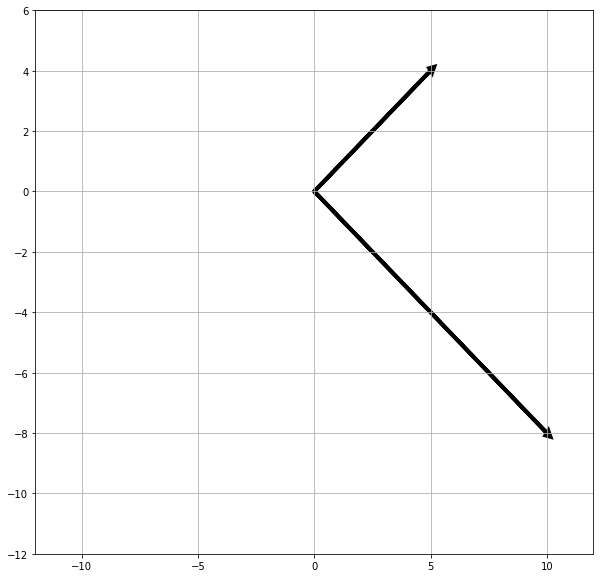

In [14]:
v1 = [5, 4]
v2 = [10, -8]

fig, ax = plt.subplots(figsize= (10,10))
ax.grid()
plt.xlim(-12,12)
plt.ylim(-12,6)

for vector in [v1,v2]:
  plt.arrow(0,0,vector[0],vector[1],head_width=.2, head_length=0.2, linewidth=4)
plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

### If the dot product of two vectors is 0, they are orthogonal, which mean theses two vectors are not orthogonal.

In [15]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

### They are all the length of the vector or the norm

In [16]:
c = np.array([2,-15,6,20])
np.linalg.norm(c)**2


665.0

In [17]:
(c*c).sum()

665

In [18]:
c_t = c.T
(c_t*c).sum()

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
d = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1\\0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [19]:
f = np.array([4,12,11,9,2])

norm_f = np.linalg.norm(f)
print('norm','{:.4f}'.format(norm_f))

f_hat = f/np.linalg.norm(f)
print('unit vector:',f_hat)

f_hat_norm = np.linalg.norm(f_hat)
print('unit vector norm:','{:.4f}'.format(f_hat_norm))

norm 19.1311
unit vector: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
unit vector norm: 1.0000


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

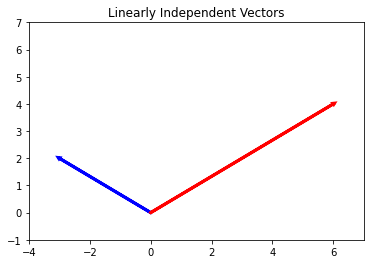

In [45]:
plt.xlim(-4,7)          
plt.ylim(-1,7)

# Original Vector
a = [-3,2] 
b = [6, 4]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

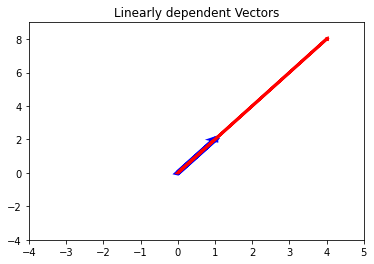

In [39]:
g = [1,2]
h = [4,8]
plt.xlim(-4,5)
plt.ylim(-4,9)
plt.arrow(0,0, g[0], g[1], linewidth=5, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, h[0], h[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly dependent Vectors")
plt.show()


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

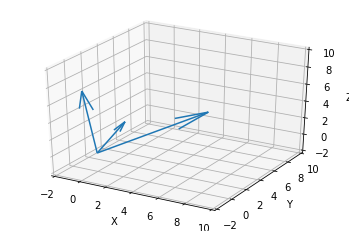

In [42]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-2, 10])
ax.set_ylim([-2, 10])
ax.set_zlim([-2, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



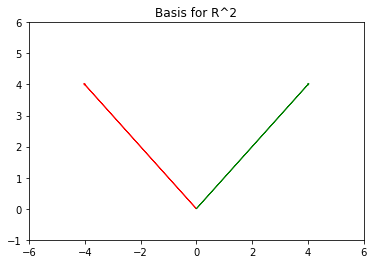

In [46]:
vector1 = [-4,4]
vector2 = [4,4]

plt.arrow(0,0, vector1[0], vector1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector2[0], vector2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-6,6)          
plt.ylim(-1,6)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

#### a subset of vectors in V that are linearly independent and span the vector V space 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [29]:
p = np.mat('1 2 3 ; -1 0 7 ; 4 8 2')
print('Rank:',np.linalg.matrix_rank(p))

Rank: 3


## 7.2 What does the rank of a matrix tell us?

### The Rank of a matrix tells us the the maximum number of linearly independent column vectors in the matrix or , the maximum number of linearly independent row vectors in the matrix..


### Dimension of columns 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [32]:
v = np.array([1,3])
w = np.array([-1,2])

w_dot_v = np.dot(w,v)
v_dot_v = np.dot(v,v)

fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)


[0.5 1.5]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


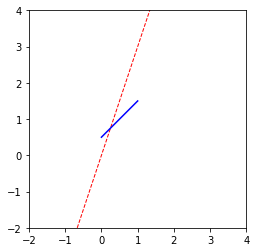

In [43]:
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals
plt.xlim(-2,4)          
plt.ylim(-2,4)
axes = plt.gca()
plt.axes().set_aspect('equal')
plt.plot(x_vals, y_vals, '--', color='r', linewidth=1)
plt.plot(projection, color= 'b')

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

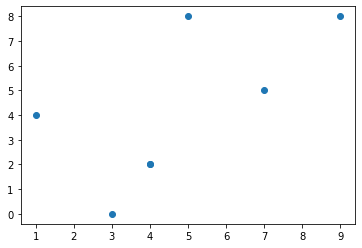

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()